<h1><center>Exploratory Data Analysis: Kevin Durant Shots</center></h1>

This notebook will show how to perform an exploratory data analysis on a dataset. The dataset this notebook will be exploring will be the shots taken by Kevin Durant during the 2023/24 season, each row in the dataset will represent a shot taken by Kevin Durant and it includes a variety of variables such as shot distance, result of the shot and location of the shot.

<h3>Import Libraries</h3>

In [34]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [8]:
kd_shots_df = pd.read_csv('../data/kd_shots_24.csv', index_col=[0])

<h3>Data Understanding</h3>

In [9]:
#Show the first five rows in the DataFrame
kd_shots_df.head()

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
44468,2024,2023-24,1610612756,Phoenix Suns,201142,Kevin Durant,F,PF,11-10-2023,22300015,...,In The Paint (Non-RA),Center,C,8-16 ft.,-4.3,18.05,13,1,10,38
44474,2024,2023-24,1610612756,Phoenix Suns,201142,Kevin Durant,F,PF,11-10-2023,22300015,...,Mid-Range,Left Side,L,8-16 ft.,12.9,6.55,12,1,7,20
44476,2024,2023-24,1610612756,Phoenix Suns,201142,Kevin Durant,F,PF,11-10-2023,22300015,...,Restricted Area,Center,C,Less Than 8 ft.,-1.1,7.45,2,1,6,30
44478,2024,2023-24,1610612756,Phoenix Suns,201142,Kevin Durant,F,PF,11-10-2023,22300015,...,Mid-Range,Center,C,16-24 ft.,0.1,22.55,17,1,5,34
44483,2024,2023-24,1610612756,Phoenix Suns,201142,Kevin Durant,F,PF,11-10-2023,22300015,...,Above the Break 3,Left Side Center,LC,24+ ft.,19.5,23.25,26,1,3,22


In [10]:
#Show the columns in the DataFrame
kd_shots_df.columns

Index(['SEASON_1', 'SEASON_2', 'TEAM_ID', 'TEAM_NAME', 'PLAYER_ID',
       'PLAYER_NAME', 'POSITION_GROUP', 'POSITION', 'GAME_DATE', 'GAME_ID',
       'HOME_TEAM', 'AWAY_TEAM', 'EVENT_TYPE', 'SHOT_MADE', 'ACTION_TYPE',
       'SHOT_TYPE', 'BASIC_ZONE', 'ZONE_NAME', 'ZONE_ABB', 'ZONE_RANGE',
       'LOC_X', 'LOC_Y', 'SHOT_DISTANCE', 'QUARTER', 'MINS_LEFT', 'SECS_LEFT'],
      dtype='object')

In [12]:
#Show the rows and columns in the DataFrame
kd_shots_df.shape

(1436, 26)

In [13]:
#Show the Data Types in the DataFrame
kd_shots_df.dtypes

SEASON_1            int64
SEASON_2           object
TEAM_ID             int64
TEAM_NAME          object
PLAYER_ID           int64
PLAYER_NAME        object
POSITION_GROUP     object
POSITION           object
GAME_DATE          object
GAME_ID             int64
HOME_TEAM          object
AWAY_TEAM          object
EVENT_TYPE         object
SHOT_MADE            bool
ACTION_TYPE        object
SHOT_TYPE          object
BASIC_ZONE         object
ZONE_NAME          object
ZONE_ABB           object
ZONE_RANGE         object
LOC_X             float64
LOC_Y             float64
SHOT_DISTANCE       int64
QUARTER             int64
MINS_LEFT           int64
SECS_LEFT           int64
dtype: object

In [14]:
kd_shots_df.describe()

,SEASON_1,TEAM_ID,PLAYER_ID,GAME_ID,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
count,1436.0,1.436000e+03,1436.0,1.436000e+03,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,2024.0,1.610613e+09,201142.0,2.230062e+07,-0.315111,16.015738,14.514624,2.520195,5.582173,28.331476
std,0.0,0.000000e+00,0.0,3.591186e+02,10.476392,8.370498,8.407757,1.141066,3.316657,17.212309
min,2024.0,1.610613e+09,201142.0,2.230002e+07,-24.400000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,2024.0,1.610613e+09,201142.0,2.230029e+07,-8.000000,7.950000,8.750000,1.000000,3.000000,13.000000
50%,2024.0,1.610613e+09,201142.0,2.230064e+07,-0.100000,15.150000,14.000000,3.000000,6.000000,28.000000
75%,2024.0,1.610613e+09,201142.0,2.230092e+07,6.700000,22.150000,23.000000,3.000000,8.000000,43.000000
max,2024.0,1.610613e+09,201142.0,2.230120e+07,24.500000,34.250000,30.000000,6.000000,11.000000,59.000000


<h3>Data Preparation</h3>

In [18]:
#The GAME_DATE column needs to be changed from an object to a Date
kd_shots_df['GAME_DATE'] = pd.to_datetime(kd_shots_df['GAME_DATE'])

In [22]:
kd_shots_df[['GAME_DATE']].dtypes

GAME_DATE    datetime64[ns]
dtype: object

In [11]:
#Show null values if any in the columns
kd_shots_df.isnull().sum()

SEASON_1          0
SEASON_2          0
TEAM_ID           0
TEAM_NAME         0
PLAYER_ID         0
PLAYER_NAME       0
POSITION_GROUP    0
POSITION          0
GAME_DATE         0
GAME_ID           0
HOME_TEAM         0
AWAY_TEAM         0
EVENT_TYPE        0
SHOT_MADE         0
ACTION_TYPE       0
SHOT_TYPE         0
BASIC_ZONE        0
ZONE_NAME         0
ZONE_ABB          0
ZONE_RANGE        0
LOC_X             0
LOC_Y             0
SHOT_DISTANCE     0
QUARTER           0
MINS_LEFT         0
SECS_LEFT         0
dtype: int64

In [16]:
#Another way to show the NA values in the columns in your DataFrame
kd_shots_df.isna().sum()

SEASON_1          0
SEASON_2          0
TEAM_ID           0
TEAM_NAME         0
PLAYER_ID         0
PLAYER_NAME       0
POSITION_GROUP    0
POSITION          0
GAME_DATE         0
GAME_ID           0
HOME_TEAM         0
AWAY_TEAM         0
EVENT_TYPE        0
SHOT_MADE         0
ACTION_TYPE       0
SHOT_TYPE         0
BASIC_ZONE        0
ZONE_NAME         0
ZONE_ABB          0
ZONE_RANGE        0
LOC_X             0
LOC_Y             0
SHOT_DISTANCE     0
QUARTER           0
MINS_LEFT         0
SECS_LEFT         0
dtype: int64

In [24]:
#Show the duplicated values in the DataFrame
kd_shots_df.loc[kd_shots_df.duplicated()]

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,...,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT


<h3>Feature Understanding</h3>

In [28]:
#The GAME_ID is a unique identifier for each game using the value_counts() function 
#on GAME_ID allows us to view the amount of shots in each game 
kd_shots_df['GAME_ID'].value_counts()

GAME_ID
22300893    34
22300612    32
22300260    30
22300076    28
22300363    28
            ..
22300094    11
22300436    11
22300976    10
22300625    10
22300705     9
Name: count, Length: 75, dtype: int64

Text(0, 0.5, 'Number of Shots')

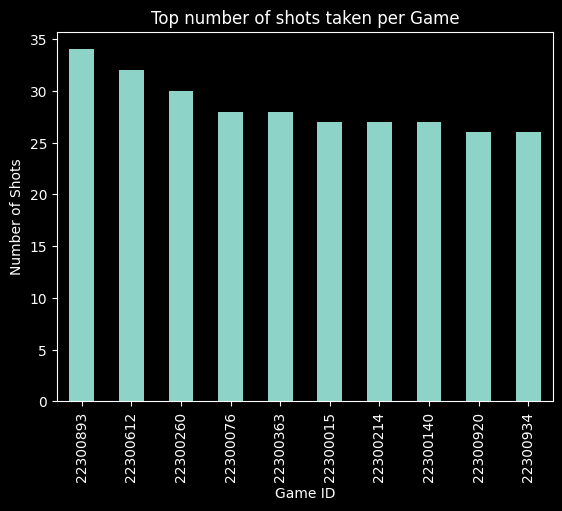

In [38]:
ax = kd_shots_df['GAME_ID'].value_counts()\
    .head(10)\
    .plot(kind='bar', title='Top 10 number of shots taken per Game')
ax.set_xlabel('Game ID')
ax.set_ylabel('Number of Shots')

In [39]:
kd_shots_df['BASIC_ZONE'].value_counts()

BASIC_ZONE
Mid-Range                485
Above the Break 3        339
In The Paint (Non-RA)    327
Restricted Area          217
Left Corner 3             34
Right Corner 3            34
Name: count, dtype: int64

Text(0, 0.5, 'Number of Shots')

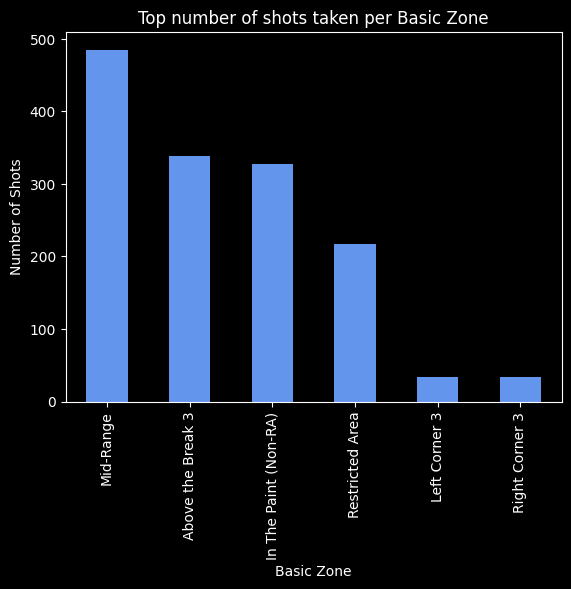

In [43]:
ax = kd_shots_df['BASIC_ZONE'].value_counts()\
    .plot(kind='bar', title='Top number of shots taken per Basic Zone', color='cornflowerblue')
ax.set_xlabel('Basic Zone')
ax.set_ylabel('Number of Shots')

<Axes: ylabel='Frequency'>

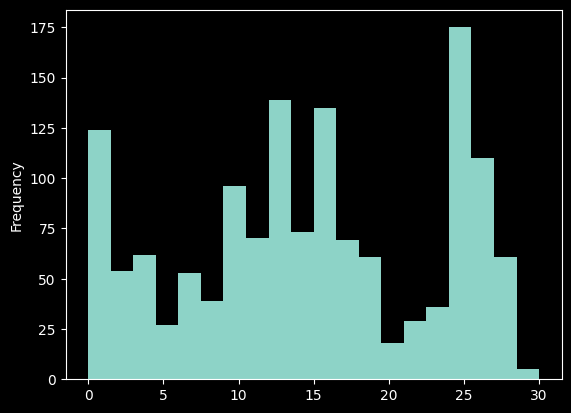

In [46]:
kd_shots_df['SHOT_DISTANCE'].plot(kind='hist', bins=20, title='Player Shot distance')

<Axes: ylabel='Frequency'>

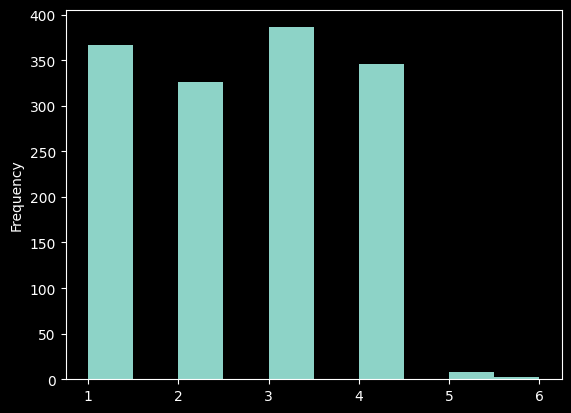

In [45]:
kd_shots_df['QUARTER'].plot(kind='hist')